In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
print("LOADING RAW DATA")
data_df = pd.read_csv('../data/raw/Data 2.csv')
stock_df = pd.read_csv('../data/raw/StockPrice.csv')
    
data_df.columns = ['Date', 'Data']
stock_df.columns = ['Date', 'Price']

print(f'Data2 shape: {data_df.shape}')
print(f'StockPrice shape: {stock_df.shape}')

print('Data2 head:')
display(data_df.head())
print('StockPrice head:')
display(stock_df.head())

LOADING RAW DATA
Data2 shape: (3902, 2)
StockPrice shape: (3839, 2)
Data2 head:


,Date,Data
0,2025-03-26,2.369
1,2025-03-25,2.365
2,2025-03-24,2.367
3,2025-03-21,2.386
4,2025-03-20,2.387


StockPrice head:


,Date,Price
0,2025-03-26,5759.50
1,2025-03-25,5826.50
2,2025-03-24,5815.50
3,2025-03-21,5718.25
4,2025-03-20,5712.75


In [4]:
# Convert Date to datetime
data_df['Date'] = pd.to_datetime(data_df['Date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [5]:
print('Data2 head:')
display(data_df.head())
print('StockPrice head:')
display(stock_df.head())

Data2 head:


,Date,Data
0,2025-03-26,2.369
1,2025-03-25,2.365
2,2025-03-24,2.367
3,2025-03-21,2.386
4,2025-03-20,2.387


StockPrice head:


,Date,Price
0,2025-03-26,5759.50
1,2025-03-25,5826.50
2,2025-03-24,5815.50
3,2025-03-21,5718.25
4,2025-03-20,5712.75


In [6]:
# Sort by date (ascending - oldest to newest)
data_df = data_df.sort_values('Date').reset_index(drop=True)
stock_df = stock_df.sort_values('Date').reset_index(drop=True)

print("\n--- Data2 Info ---")
print(f"Date range: {data_df['Date'].min()} to {data_df['Date'].max()}")
print(f"Total days: {len(data_df)}")
print(f"Missing values: {data_df.isnull().sum().sum()}")
print(f"Data type - Date: {data_df['Date'].dtype}, Data: {data_df['Data'].dtype}")


--- Data2 Info ---
Date range: 2010-01-04 00:00:00 to 2025-03-26 00:00:00
Total days: 3902
Missing values: 0
Data type - Date: datetime64[ns], Data: float64


In [7]:
print("\n--- StockPrice Info ---")
print(f"Date range: {stock_df['Date'].min()} to {stock_df['Date'].max()}")
print(f"Total days: {len(stock_df)}")
print(f"Missing values: {stock_df.isnull().sum().sum()}")
print(f"Data type - Date: {stock_df['Date'].dtype}, Price: {stock_df['Price'].dtype}")



--- StockPrice Info ---
Date range: 2010-01-04 00:00:00 to 2025-03-26 00:00:00
Total days: 3839
Missing values: 0
Data type - Date: datetime64[ns], Price: float64


In [9]:
print("--- DATASET: data2.csv ---")
display(data_df.isna().sum().to_frame(name='Missing Values'))
print(f"Non-positive values found: {(data_df['Data'] <= 0).sum()}")

print("\n--- DATASET: stockprice.csv ---")
display(stock_df.isna().sum().to_frame(name='Missing Values'))
print(f"Non-positive values found: {(stock_df['Price'] <= 0).sum()}")

# Check for duplicate dates
print(f"\nDuplicate dates in Data: {data_df.duplicated('Date').sum()}")
print(f"Duplicate dates in Stock: {stock_df.duplicated('Date').sum()}")

--- DATASET: data2.csv ---


,Missing Values
Date,0
Data,0


Non-positive values found: 1854

--- DATASET: stockprice.csv ---


,Missing Values
Date,0
Price,0


Non-positive values found: 0

Duplicate dates in Data: 0
Duplicate dates in Stock: 0


In [10]:
# Statistical summary for both
summary = pd.concat([data_df['Data'].describe(), stock_df['Price'].describe()], axis=1)
display(summary)


,Data,Price
count,3902.000000,3839.000000
mean,0.583423,2997.357020
std,1.317216,1343.596346
min,-0.605000,1072.500000
25%,-0.328000,1939.375000
50%,0.080500,2754.500000
75%,1.014750,4217.000000
max,4.002000,6163.000000


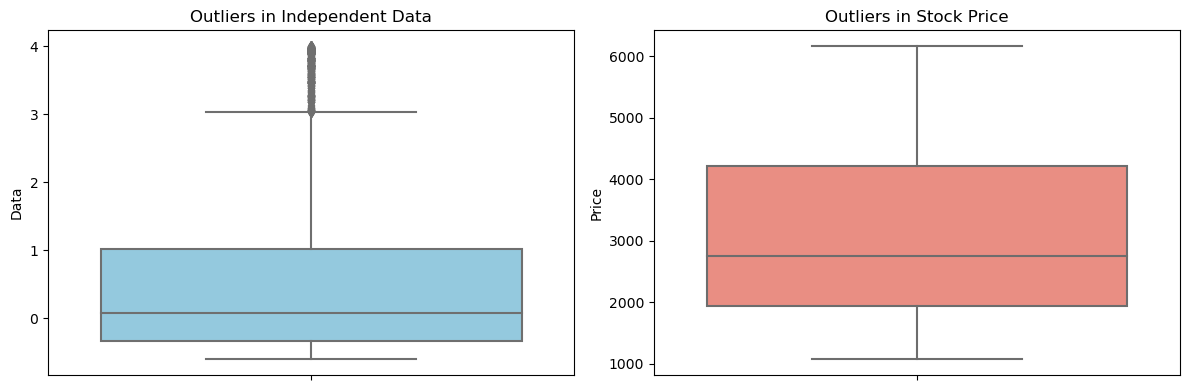

In [11]:
# Boxplots for Outliers
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_df['Data'], color='skyblue')
plt.title('Outliers in Independent Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=stock_df['Price'], color='salmon')
plt.title('Outliers in Stock Price')

plt.tight_layout()
plt.show()

In [14]:
# Calculate IQR for data_df
Q1_data = data_df['Data'].quantile(0.25)
Q3_data = data_df['Data'].quantile(0.75)
IQR_data = Q3_data - Q1_data

lower_bound_data = Q1_data - 1.5 * IQR_data
upper_bound_data = Q3_data + 1.5 * IQR_data

# Filter the dataframe for outliers
outliers_data = data_df[(data_df['Data'] < lower_bound_data) | (data_df['Data'] > upper_bound_data)]

print(f"--- Outliers in Independent Data (data_df) ---")
print(f"Lower Bound: {lower_bound_data:.4f}, Upper Bound: {upper_bound_data:.4f}")
print(f"Total Outliers Found: {len(outliers_data)}")
display(outliers_data)

--- Outliers in Independent Data (data_df) ---
Lower Bound: -2.3421, Upper Bound: 3.0289
Total Outliers Found: 415


,Date,Data
3394,2023-03-30,3.052
3395,2023-03-31,3.038
3396,2023-04-03,3.053
3397,2023-04-04,3.052
3398,2023-04-05,3.055
...,...,...
3804,2024-11-06,3.049
3805,2024-11-07,3.032
3806,2024-11-08,3.032
3807,2024-11-11,3.040


In [15]:
# Calculate IQR for stock_df
Q1_stock = stock_df['Price'].quantile(0.25)
Q3_stock = stock_df['Price'].quantile(0.75)
IQR_stock = Q3_stock - Q1_stock

lower_bound_stock = Q1_stock - 1.5 * IQR_stock
upper_bound_stock = Q3_stock + 1.5 * IQR_stock

# Filter the dataframe for outliers
outliers_stock = stock_df[(stock_df['Price'] < lower_bound_stock) | (stock_df['Price'] > upper_bound_stock)]

print(f"--- Outliers in Stock Price (stock_df) ---")
print(f"Lower Bound: {lower_bound_stock:.4f}, Upper Bound: {upper_bound_stock:.4f}")
print(f"Total Outliers Found: {len(outliers_stock)}")
display(outliers_stock)

--- Outliers in Stock Price (stock_df) ---
Lower Bound: -1477.0625, Upper Bound: 7633.4375
Total Outliers Found: 0


,Date,Price


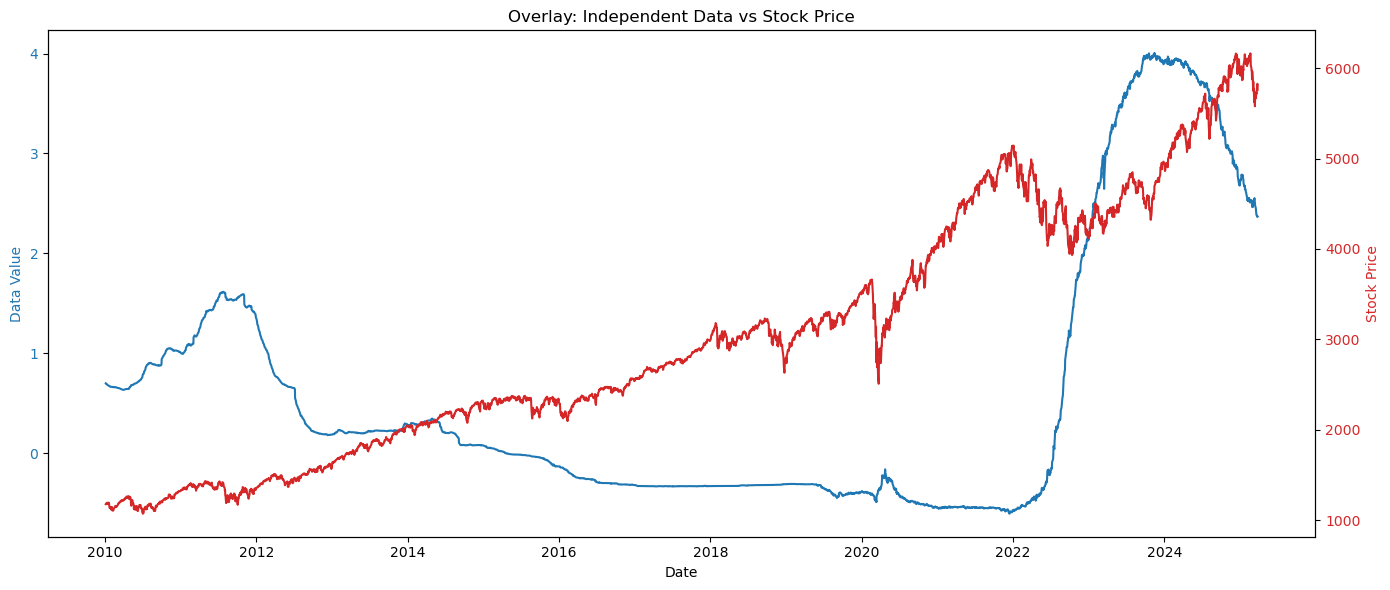

In [12]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Independent Data
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Data Value', color=color)
ax1.plot(data_df['Date'], data_df['Data'], color=color, label='Independent Data')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Stock Price
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Stock Price', color=color)
ax2.plot(stock_df['Date'], stock_df['Price'], color=color, label='Stock Price')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Overlay: Independent Data vs Stock Price')
fig.tight_layout()
plt.show()

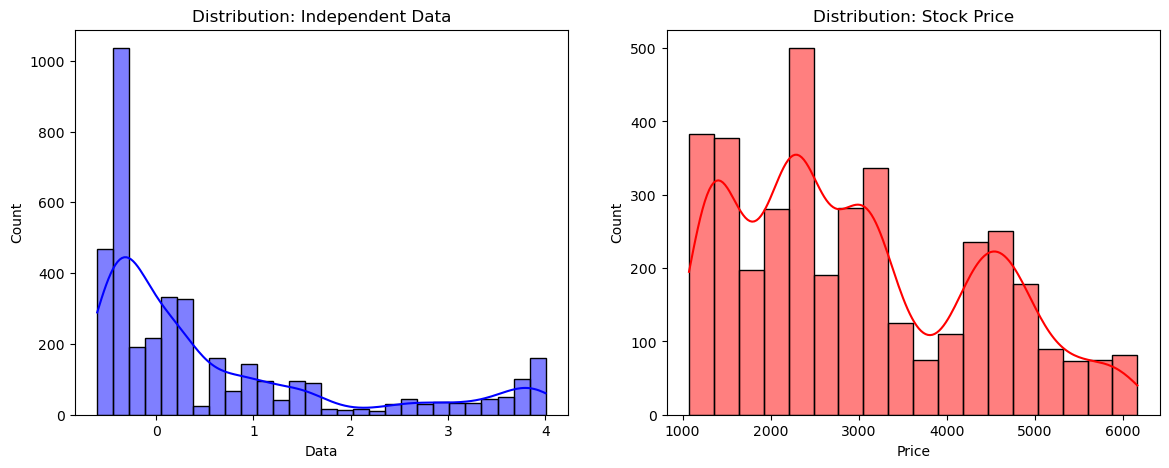

Data Skewness: 1.43
Stock Price Skewness: 0.49


In [13]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_df['Data'], kde=True, color='blue')
plt.title('Distribution: Independent Data')

plt.subplot(1, 2, 2)
sns.histplot(stock_df['Price'], kde=True, color='red')
plt.title('Distribution: Stock Price')

plt.show()

print(f"Data Skewness: {data_df['Data'].skew():.2f}")
print(f"Stock Price Skewness: {stock_df['Price'].skew():.2f}")

(array([13879., 14610., 15340., 16071., 16801., 17532., 18262., 18993.,
        19723., 20454.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

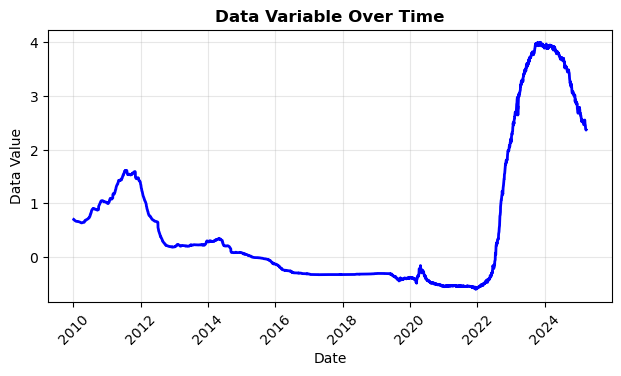

In [16]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 1. Data over time
ax1 = plt.subplot(3, 2, 1)
ax1.plot(data_df['Date'], data_df['Data'], linewidth=2, color='blue')
ax1.set_title('Data Variable Over Time', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Data Value')
ax1.grid(True, alpha=0.3)
plt.xticks(rotation=45)

(array([13879., 14610., 15340., 16071., 16801., 17532., 18262., 18993.,
        19723., 20454.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

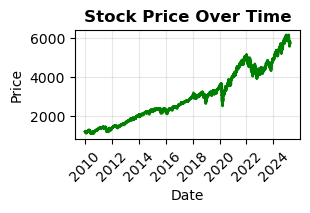

In [17]:
ax2 = plt.subplot(3, 2, 2)
ax2.plot(stock_df['Date'], stock_df['Price'], linewidth=2, color='green')
ax2.set_title('Stock Price Over Time', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.grid(True, alpha=0.3)
plt.xticks(rotation=45)

In [18]:
# Merge on Date
df = pd.merge(data_df, stock_df, on='Date', how='inner')
df = df.sort_values('Date').reset_index(drop=True)

print(f"\nMerged dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days: {len(df)}")
print(f"Missing values: {df.isnull().sum().sum()}")


Merged dataset shape: (3802, 3)
Date range: 2010-01-04 00:00:00 to 2025-03-26 00:00:00
Total days: 3802
Missing values: 0


In [20]:
print("\nFirst 10 rows of merged data:")
display(df.head(10))

print("\nLast 10 rows of merged data:")
display(df.tail(10))


First 10 rows of merged data:


,Date,Data,Price
0,2010-01-04,0.700,1178.00
1,2010-01-05,0.699,1181.50
2,2010-01-06,0.694,1182.25
3,2010-01-07,0.692,1186.75
4,2010-01-08,0.691,1190.75
5,2010-01-11,0.689,1191.75
6,2010-01-12,0.685,1183.25
7,2010-01-13,0.684,1190.75
8,2010-01-14,0.682,1194.50
9,2010-01-15,0.680,1181.50



Last 10 rows of merged data:


,Date,Data,Price
3792,2025-03-13,2.501,5577.75
3793,2025-03-14,2.478,5690.25
3794,2025-03-17,2.456,5730.50
3795,2025-03-18,2.426,5668.25
3796,2025-03-19,2.411,5728.75
3797,2025-03-20,2.387,5712.75
3798,2025-03-21,2.386,5718.25
3799,2025-03-24,2.367,5815.50
3800,2025-03-25,2.365,5826.50
3801,2025-03-26,2.369,5759.50


In [21]:
# Check if any dates were lost in merge
print(f"\nDays in Data2: {len(data_df)}")
print(f"Days in StockPrice: {len(stock_df)}")
print(f"Days in Merged: {len(df)}")
print(f"Days lost: {max(len(data_df), len(stock_df)) - len(df)}")


Days in Data2: 3902
Days in StockPrice: 3839
Days in Merged: 3802
Days lost: 100


In [24]:

print("DESCRIPTIVE STATISTICS")

print("\n--- Data Variable Statistics ---")
print(df['Data'].describe())

print("\n--- Stock Price Statistics ---")
print(df['Price'].describe())

DESCRIPTIVE STATISTICS

--- Data Variable Statistics ---
count    3802.000000
mean        0.581751
std         1.316218
min        -0.605000
25%        -0.328000
50%         0.080000
75%         1.014000
max         4.002000
Name: Data, dtype: float64

--- Stock Price Statistics ---
count    3802.000000
mean     2998.059534
std      1344.173515
min      1072.500000
25%      1938.937500
50%      2754.750000
75%      4217.375000
max      6163.000000
Name: Price, dtype: float64


In [25]:
# Calculate day-over-day changes
df['Data_Change'] = df['Data'].diff()
df['Price_Change'] = df['Price'].diff()
print('Data Change Statistics:')
display(df['Data_Change'].describe())
print('Price Change Statistics:')
display(df['Price_Change'].describe())
print('Sample with changes:')
display(df[['Date', 'Data', 'Data_Change', 'Price', 'Price_Change']].head(15))

Data Change Statistics:


count    3801.000000
mean        0.000439
std         0.012245
min        -0.204000
25%        -0.002000
50%         0.000000
75%         0.001000
max         0.142000
Name: Data_Change, dtype: float64

Price Change Statistics:


count    3801.000000
mean        1.205341
std        31.921943
min      -279.750000
25%        -9.500000
50%         1.500000
75%        13.500000
max       227.000000
Name: Price_Change, dtype: float64

Sample with changes:


,Date,Data,Data_Change,Price,Price_Change
0,2010-01-04,0.700,NaN,1178.00,NaN
1,2010-01-05,0.699,-0.001,1181.50,3.50
2,2010-01-06,0.694,-0.005,1182.25,0.75
3,2010-01-07,0.692,-0.002,1186.75,4.50
4,2010-01-08,0.691,-0.001,1190.75,4.00
5,2010-01-11,0.689,-0.002,1191.75,1.00
6,2010-01-12,0.685,-0.004,1183.25,-8.50
7,2010-01-13,0.684,-0.001,1190.75,7.50
8,2010-01-14,0.682,-0.002,1194.50,3.75
9,2010-01-15,0.680,-0.002,1181.50,-13.00


In [26]:
df.head()

,Date,Data,Price,Data_Change,Price_Change
0,2010-01-04,0.700,1178.00,NaN,NaN
1,2010-01-05,0.699,1181.50,-0.001,3.50
2,2010-01-06,0.694,1182.25,-0.005,0.75
3,2010-01-07,0.692,1186.75,-0.002,4.50
4,2010-01-08,0.691,1190.75,-0.001,4.00


In [27]:
df[["Data", "Price"]].describe()


,Data,Price
count,3802.000000,3802.000000
mean,0.581751,2998.059534
std,1.316218,1344.173515
min,-0.605000,1072.500000
25%,-0.328000,1938.937500
50%,0.080000,2754.750000
75%,1.014000,4217.375000
max,4.002000,6163.000000


In [28]:
df[["Data", "Price"]].skew()


Data     1.436779
Price    0.484764
dtype: float64

In [29]:
df[["Data_Change", "Price_Change"]].describe()


,Data_Change,Price_Change
count,3801.000000,3801.000000
mean,0.000439,1.205341
std,0.012245,31.921943
min,-0.204000,-279.750000
25%,-0.002000,-9.500000
50%,0.000000,1.500000
75%,0.001000,13.500000
max,0.142000,227.000000


In [30]:
corr_cols = ["Data", "Price", "Data_Change", "Price_Change"]
corr_matrix = df[corr_cols].dropna().corr()

corr_matrix


,Data,Price,Data_Change,Price_Change
Data,1.000000,0.378515,0.030618,0.016164
Price,0.378515,1.000000,0.040438,0.025106
Data_Change,0.030618,0.040438,1.000000,-0.028239
Price_Change,0.016164,0.025106,-0.028239,1.000000


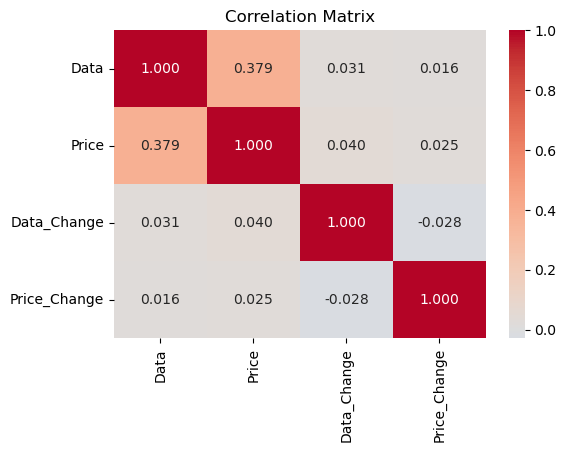

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f", center=0)
plt.title("Correlation Matrix")
plt.show()


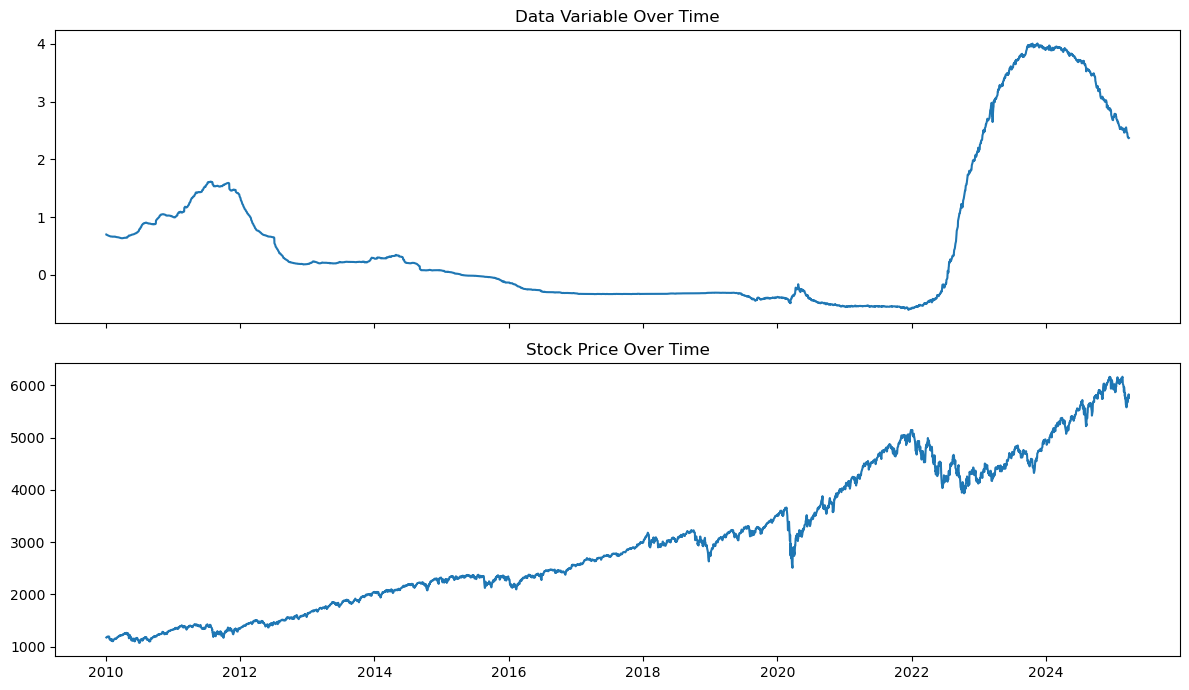

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

ax[0].plot(df["Date"], df["Data"])
ax[0].set_title("Data Variable Over Time")

ax[1].plot(df["Date"], df["Price"])
ax[1].set_title("Stock Price Over Time")

plt.tight_layout()
plt.show()


In [33]:
df["Price_Lag1"] = df["Price"].shift(1)
df["Data_Lag1"] = df["Data"].shift(1)
df["Data_Change_Lag1"] = df["Data_Change"].shift(1)

df["Target_Price"] = df["Price"].shift(-1)


In [34]:
df[
    ["Date", "Price_Lag1", "Data_Lag1", "Data_Change_Lag1", "Target_Price"]
].head(10)


,Date,Price_Lag1,Data_Lag1,Data_Change_Lag1,Target_Price
0,2010-01-04,NaN,NaN,NaN,1181.50
1,2010-01-05,1178.00,0.700,NaN,1182.25
2,2010-01-06,1181.50,0.699,-0.001,1186.75
3,2010-01-07,1182.25,0.694,-0.005,1190.75
4,2010-01-08,1186.75,0.692,-0.002,1191.75
5,2010-01-11,1190.75,0.691,-0.001,1183.25
6,2010-01-12,1191.75,0.689,-0.002,1190.75
7,2010-01-13,1183.25,0.685,-0.004,1194.50
8,2010-01-14,1190.75,0.684,-0.001,1181.50
9,2010-01-15,1194.50,0.682,-0.002,1195.00


In [35]:
df_model = df.dropna().reset_index(drop=True)

df_model.shape


(3799, 9)

In [36]:
df_model[
    ["Price_Lag1", "Data_Lag1", "Data_Change_Lag1", "Target_Price"]
].head()


,Price_Lag1,Data_Lag1,Data_Change_Lag1,Target_Price
0,1181.50,0.699,-0.001,1186.75
1,1182.25,0.694,-0.005,1190.75
2,1186.75,0.692,-0.002,1191.75
3,1190.75,0.691,-0.001,1183.25
4,1191.75,0.689,-0.002,1190.75


In [37]:
df_model.to_csv("../data/processed/processed_data.csv", index=False)


In [38]:
summary = {
    "Total Records": len(df_model),
    "Features": ["Price_Lag1", "Data_Lag1", "Data_Change_Lag1"],
    "Target": "Target_Price",
    "Start Date": df_model["Date"].min(),
    "End Date": df_model["Date"].max(),
}

summary


{'Total Records': 3799,
 'Features': ['Price_Lag1', 'Data_Lag1', 'Data_Change_Lag1'],
 'Target': 'Target_Price',
 'Start Date': Timestamp('2010-01-06 00:00:00'),
 'End Date': Timestamp('2025-03-25 00:00:00')}

In [5]:
import pandas as pd
merged_df=pd.read_csv('../data/processed/processed_data.csv')

In [7]:
corr_cols = ["Data", "Price", "Data_Change", "Price_Change", "Price_Lag1", "Data_Lag1", "Data_Change_Lag1", "Target_Price"]
corr_matrix = merged_df[corr_cols].dropna().corr()

corr_matrix

,Data,Price,Data_Change,Price_Change,Price_Lag1,Data_Lag1,Data_Change_Lag1,Target_Price
Data,1.000000,0.378206,0.030524,0.016940,0.377933,0.999957,0.031926,0.378477
Price,0.378206,1.000000,0.040272,0.026324,0.999718,0.377922,0.040501,0.999718
Data_Change,0.030524,0.040272,1.000000,-0.028091,0.040953,0.021225,0.143318,0.040338
Price_Change,0.016940,0.026324,-0.028091,1.000000,0.002569,0.017205,0.003219,0.024870
Price_Lag1,0.377933,0.999718,0.040953,0.002569,1.000000,0.377643,0.040438,0.999470
Data_Lag1,0.999957,0.377922,0.021225,0.017205,0.377643,1.000000,0.030600,0.378193
Data_Change_Lag1,0.031926,0.040501,0.143318,0.003219,0.040438,0.030600,1.000000,0.039536
Target_Price,0.378477,0.999718,0.040338,0.024870,0.999470,0.378193,0.039536,1.000000
